## ANALISI PCA CON PREPROCESSING E SVD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import plotly.express as px
import seaborn as sns

In [2]:
df=pd.read_excel('olive_oil.xlsx')
#sostituisco il nome della prima colonna con "Class"
df.rename(columns={'Unnamed: 0':'Class'}, inplace=True )
#rimuovo gli spazi dai nomi 
df.rename(columns=lambda x: x.strip(), inplace=True)

labels = labels = list(df['Class'].unique())

class_row = df['Class']

In [3]:
#Rimuovo la prima riga contentente solo Stringhe, creando così la matrice dei dati X
X = df.drop('Class', axis=1)
n,m = X.shape
print(f"{n}, {m}")
X.head()

382, 7


,palmitico,palmitoleico,stearico,oleico,linoleico,eicosanoico,linolenico
0,10.750000,0.75,2.26,78.230011,6.72,0.36,0.60
1,10.880000,0.73,2.24,77.089996,7.81,0.31,0.61
2,9.109999,0.54,2.46,81.129997,5.49,0.31,0.63
3,9.660000,0.57,2.40,79.519997,6.19,0.50,0.78
4,10.510000,0.67,2.59,77.709999,6.72,0.50,0.80


### Esegui **una** delle seguenti 3 celle per effettuare il preprocessing

## Preprocessing - None

In [4]:
X_after = X

## Preprocessing - Autoscaling

In [5]:
X_after = (X - X.mean())/X.std()

## Preprocessing - Mean centering

In [20]:
X_after = X - X.mean()

In [6]:
X_after.head()

,palmitico,palmitoleico,stearico,oleico,linoleico,eicosanoico,linolenico
0,-0.967736,-1.046550,0.166397,1.054802,-1.149469,0.427719,0.353491
1,-0.896904,-1.080687,0.107213,0.816074,-0.718221,0.064310,0.396468
2,-1.861303,-1.404992,0.758238,1.662081,-1.636106,0.064310,0.482422
3,-1.561631,-1.353786,0.580686,1.324935,-1.359158,1.445265,1.127076
4,-1.098502,-1.183099,1.142935,0.945908,-1.149469,1.445265,1.213029


## SVD

In [7]:
U,s,Vt = np.linalg.svd(X_after,full_matrices=False,compute_uv=True)
V = Vt.T
S = np.diag(s)
print(f"X {X.shape} = U {U.shape} S {S.shape} V {V.shape}")

X (382, 7) = U (382, 7) S (7, 7) V (7, 7)


In [8]:
T = np.dot(U,S) #Scores 
#T = U*S
P = V   #Loadings

Data = np.dot(T,P.T)
E = np.subtract(X,Data)
Eigen_pca = np.power(S,2)/(n-1)


[Text(0.5, 0, 'Componenti principali'), Text(0, 0.5, 'Varianza Spiegata')]

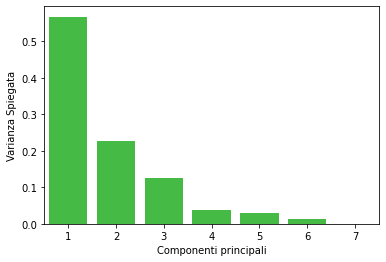

In [9]:
ax = plt.subplot()
var_explained = np.round(s**2/np.sum(s**2), decimals=3)
sns.barplot(x=list(range(1,len(var_explained)+1)),
            y=var_explained, color="limegreen")
ax.set(xlabel="Componenti principali", ylabel="Varianza Spiegata")

Calcolo delle componenti principali

In [10]:
k = 3 #numero di componenti principali da calcolare
US_k = U[:, 0:k].dot(S[0:k, 0:k])
US_k.shape

(382, 3)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

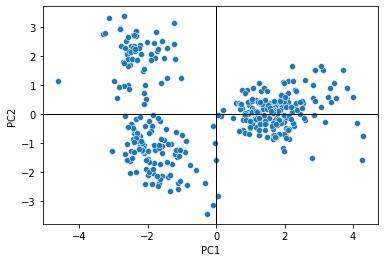

In [11]:
#PC1  e PC2
ax = plt.subplot()
ax.axhline(y=0, color='k', linewidth=1)
ax.axvline(x=0, color='k', linewidth=1)
ax.set(xlabel='PC1', ylabel='PC2')
sns.scatterplot(x=T[:,0], y=T[:,1])


<AxesSubplot:xlabel='PC2', ylabel='PC3'>

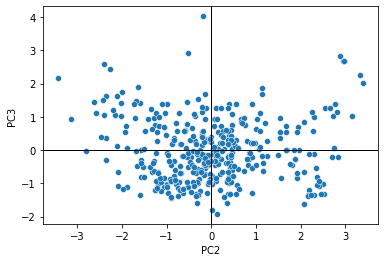

In [12]:
#PC2 E PC3
ax = plt.subplot()
ax.axhline(y=0, color='k', linewidth=1)
ax.axvline(x=0, color='k', linewidth=1)
ax.set(xlabel='PC2', ylabel='PC3')
sns.scatterplot(x=T[:,1],y=T[:,2])

Plot Loadings

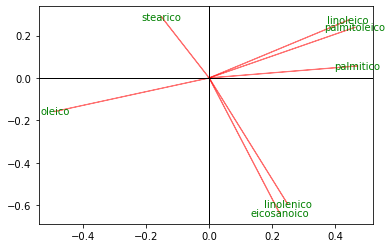

In [14]:
Loadings_N = P.shape[0]
ax = plt.subplot()
ax.axhline(y=0, color='k', linewidth=1)
ax.axvline(x=0, color='k', linewidth=1)
for i in range(Loadings_N):
     plt.arrow(0, 0, P[i,0], P[i,1],color = 'r',alpha = 0.5) 
     plt.text(P[i,0], P[i,1], X_after.columns[i], color = 'g', ha = 'center', va = 'center')#aggiungo il nome 

### da guardare https://cmdlinetips.com/2018/03/pca-example-in-python-with-scikit-learn/
###                https://github.com/ostwalprasad/ostwalprasad.github.io/blob/master/jupyterbooks/2019-01-20-PCA%20using%20python.ipynb